In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
import plotly.express as px
import plotly.graph_objects as go


In [2]:
data = pd.read_excel("/Users/sonn/Sonn/Workspace/Projects/IR-HPLCCinnamonProject/data/Data.xlsx", sheet_name="Vungtrong (140)")
data.head(10)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1,21.1.8.YB-13,1,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2,21.1.8.YB-24,1,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3,21.1.8.YB-38,1,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4,21.1.8.YB-40,1,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5,21.1.8.YB-41,1,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001
5,6,21.1.8.YB-42,1,1.02,0.08,4.37,0.246,0.245,0.246,0.245,...,-0.002,-0.002,-0.002,-0.001,-0.001,-0.001,-0.001,-0.002,-0.003,-0.003
6,7,21.1.8.YB-43,1,1.45,0.09,3.30,0.260,0.261,0.262,0.260,...,-0.004,-0.005,-0.005,-0.004,-0.003,-0.004,-0.004,-0.005,-0.005,-0.005
7,8,21.1.8.YB-44,1,1.65,0.06,4.01,0.248,0.248,0.248,0.247,...,-0.002,-0.003,-0.002,-0.001,-0.001,-0.001,-0.002,-0.003,-0.003,-0.003
8,9,21.1.8.YB-47,1,0.77,0.03,3.10,0.237,0.237,0.235,0.235,...,0.004,0.004,0.004,0.004,0.005,0.005,0.004,0.003,0.003,0.003
9,10,21.1.8.YB-48,1,1007.00,0.04,4.59,0.266,0.267,0.268,0.264,...,-0.001,-0.001,-0.001,0.000,0.000,0.000,-0.001,-0.001,-0.002,-0.002


In [3]:
y = data["Group"]
le = LabelEncoder()
y = le.fit_transform(y)
X = data.iloc[:, 6:]
X.columns = X.columns.astype(str)
cols = X.columns
print(np.unique(y))
print(le.inverse_transform(np.unique(y)))

[0 1 2 3]
[1 2 3 4]


In [4]:
X = pd.DataFrame(X, columns=cols)

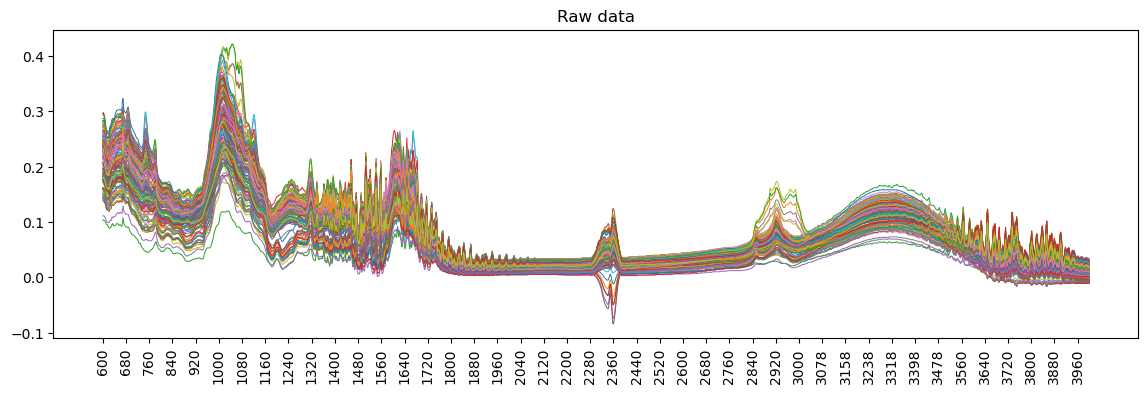

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(X.T, linewidth= 0.7)
plt.xticks(X.columns[::40], rotation=90)
plt.title("Raw data")
plt.show()

In [6]:
X = np.array(X)
y = np.array(y)

n_classes = len(np.unique(y))
n_test_samples_per_class = int(len(X) * 0.25 / n_classes)

classes = np.unique(y)

X_train_list, X_test_list = [], []
y_train_list, y_test_list = [], []

# For each class, split data to have equal test size
for cls in classes:
    # Get indices for this class
    class_indices = np.where(y == cls)[0]
    
    # Split the data for this class
    X_class, X_class_test, y_class, y_class_test = train_test_split(
        X[class_indices], y[class_indices], test_size=n_test_samples_per_class, random_state=42
    )
    
    # Append the splits to the train/test lists
    X_train_list.append(X_class)
    X_test_list.append(X_class_test)
    y_train_list.append(y_class)
    y_test_list.append(y_class_test)

# Combine back into arrays
X_train = np.vstack(X_train_list)  # Combine all classes' training data
X_test = np.vstack(X_test_list)      # Combine all classes' test data
y_train = np.hstack(y_train_list)  # Combine all classes' training labels
y_test = np.hstack(y_test_list)      # Combine all classes' test labels

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)

Training set shape: (107, 1701) (107,)
Validation set shape: (32, 1701) (32,)


In [7]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from typing import Union, List, Dict

import numpy as np
from joblib import Parallel, delayed
class SPA():
    def __init__(self,
                 n_features_to_select: int = None,
                 n_cv_folds: int = 5,
                 pls: PLSRegression = None,
                 n_jobs: int = -1):
        self.n_features_to_select = n_features_to_select
        self.pls = SVC(kernel = 'linear')
        self.n_cv_folds = n_cv_folds
        self.n_jobs = n_jobs

    def fit_spa(self, X, y, seed):
        wavelength_map = np.arange(X.shape[1])
        selected_wave_length = [seed]
        selected_vector = X[:, seed:seed+1]
        remain_wavelength = np.delete(wavelength_map, seed)
        remain_vectors = np.delete(X, seed, 1)

        for i in range(self.n_features_to_select - 1):
            selected_vector = selected_vector / np.linalg.norm(selected_vector, ord = 2)
            orthogonal_vectors = remain_vectors - selected_vector @ np.transpose(np.transpose(remain_vectors) @ selected_vector)
            orthogonal_norms = np.linalg.norm(orthogonal_vectors, ord = 2, axis=0)
            max_length_vector_idx = np.argmax(orthogonal_norms)

            selected_wave_length.append(remain_wavelength[max_length_vector_idx])
            wavelength_map = np.delete(wavelength_map, max_length_vector_idx, )

            selected_vector = orthogonal_vectors[:, max_length_vector_idx:max_length_vector_idx+1]
            remain_wavelength = np.delete(remain_wavelength, max_length_vector_idx)
            remain_vectors = np.delete(remain_vectors, max_length_vector_idx, 1)

        loss = 1 - np.mean(cross_val_score(self.pls, X[:, selected_wave_length], y, cv = self.n_cv_folds))
        # mse = cro(y_pred, y)
        return loss, selected_wave_length

    def fit(self, X, y):
        candidates = Parallel(n_jobs=self.n_jobs)(delayed(self.fit_spa)(X, y, seed) for seed in range(X.shape[1]))
        print(candidates)
        loss, otp_wavelength = min(candidates, key=lambda x: x[1])

        return loss, otp_wavelength


In [8]:
spa_lda = SPA(100)
mse, otp_wavelength = spa_lda.fit(X_train, y_train)
otp_wavelength = sorted(otp_wavelength)

[(np.float64(0.37316017316017325), [0, np.int64(453), np.int64(207), np.int64(471), np.int64(208), np.int64(479), np.int64(209), np.int64(454), np.int64(206), np.int64(470), np.int64(205), np.int64(472), np.int64(210), np.int64(1567), np.int64(204), np.int64(461), np.int64(211), np.int64(1525), np.int64(212), np.int64(1575), np.int64(203), np.int64(460), np.int64(213), np.int64(1568), np.int64(202), np.int64(428), np.int64(214), np.int64(478), np.int64(215), np.int64(524), np.int64(216), np.int64(1524), np.int64(201), np.int64(518), np.int64(217), np.int64(458), np.int64(218), np.int64(459), np.int64(200), np.int64(508), np.int64(219), np.int64(542), np.int64(220), np.int64(879), np.int64(221), np.int64(880), np.int64(222), np.int64(881), np.int64(199), np.int64(462), np.int64(223), np.int64(455), np.int64(224), np.int64(1576), np.int64(198), np.int64(429), np.int64(225), np.int64(558), np.int64(226), np.int64(1573), np.int64(197), np.int64(504), np.int64(227), np.int64(503), np.int64(

In [9]:
X_train = X_train[:, otp_wavelength]
X_test = X_test[:, otp_wavelength]

In [10]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state=42)
# Fit the model to generate the data.
X_train, y_train = sm.fit_resample(X_train, y_train)

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


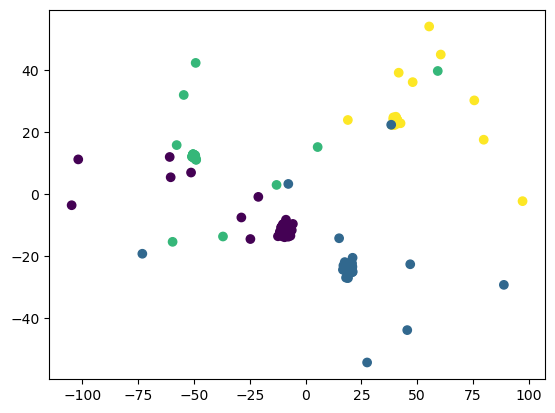

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c = y_train)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c = y_test)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

y_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred)
lda_accuracy

0.625

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)
y_pred = svm.predict(X_test_lda)
lda_svm_accuracy = accuracy_score(y_test, y_pred)
lda_svm_accuracy 

0.625

LDA-SVC

Accuracy score: 0.53125


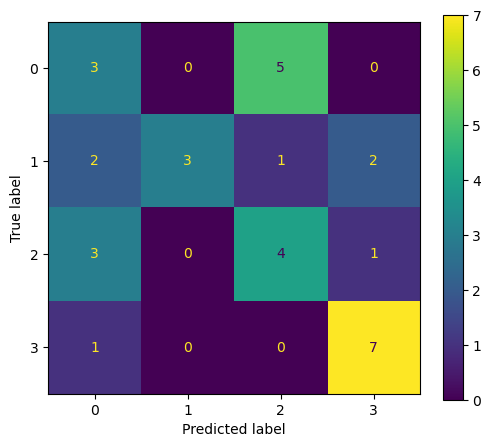

In [15]:
lda = LinearDiscriminantAnalysis()
svc = SVC()
pipeline = Pipeline(steps=[('lda', lda), ('svc', svc)])
param_grid = {
    'lda__n_components': np.arange(1,3),
    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()


In [16]:
accuracy_score(y_test, y_pred)

0.53125

LDA-GaussianNB



{'lda__n_components': np.int64(2)}
Accuracy score: 0.59375


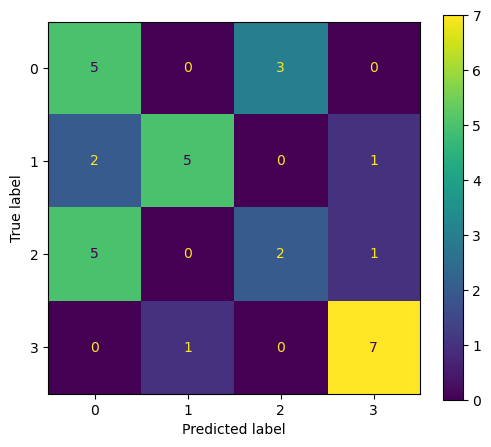

In [17]:
lda = LinearDiscriminantAnalysis()
gauss_nb = GaussianNB()
pipeline = Pipeline(steps=[('lda', lda), ('gauss', gauss_nb)])
param_grid = {
    'lda__n_components': np.arange(1,3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 
print("\n")
print(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score:",accuracy_score(y_test, y_pred))

cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()


In [18]:
accuracy_score(y_test, y_pred)

0.59375

LDA-BernoulliNB

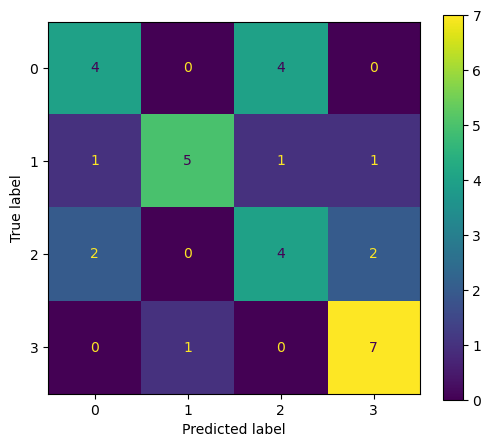

Accuracy score: 0.625


In [19]:
lda = LinearDiscriminantAnalysis()
ber_nb = BernoulliNB()
pipeline = Pipeline(steps=[('lda', lda), ('ber', ber_nb)])
param_grid = {
    'lda__n_components': np.arange(1, 3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 
print("\n")
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()
print("Accuracy score:",accuracy_score(y_test, y_pred))

LDA-RF

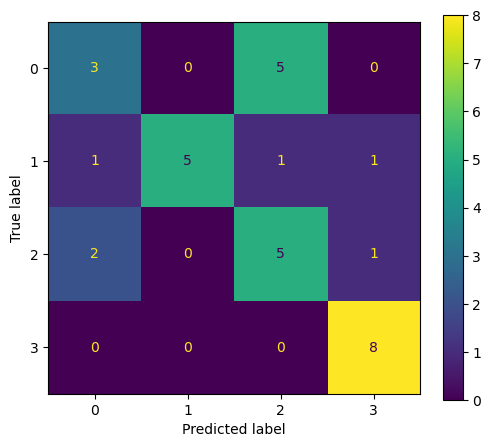

Accuracy score: 0.65625


In [20]:
lda = LinearDiscriminantAnalysis()
rf = RandomForestClassifier()
pipeline = Pipeline(steps=[('lda', lda), ('rf', rf)])
param_grid = {
    'lda__n_components': np.arange(1,3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

print("Accuracy score:",accuracy_score(y_test, y_pred))


LDA-DT

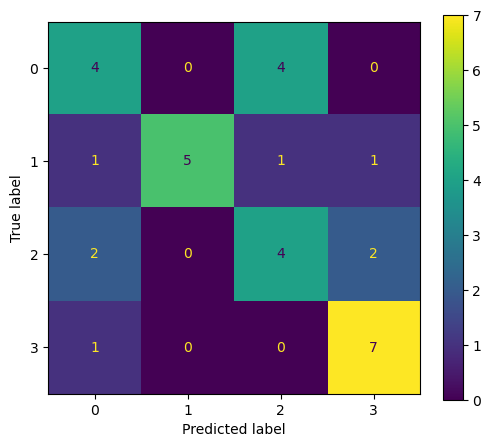

Accuracy score: 0.625


In [21]:
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('lda', lda), ('dt', dt)])
param_grid = {
    'lda__n_components': np.arange(1,3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

print("Accuracy score:",accuracy_score(y_test, y_pred))


LDA-AdaBoost

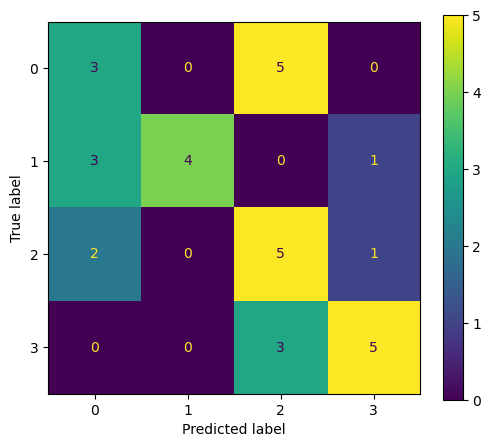

Accuracy score: 0.53125


In [22]:
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
pipeline = Pipeline(steps=[('lda', lda), ('ada', ada)])
param_grid = {
    'lda__n_components': np.arange(1,3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

print("Accuracy score:",accuracy_score(y_test, y_pred))

LDA-GradientBoost

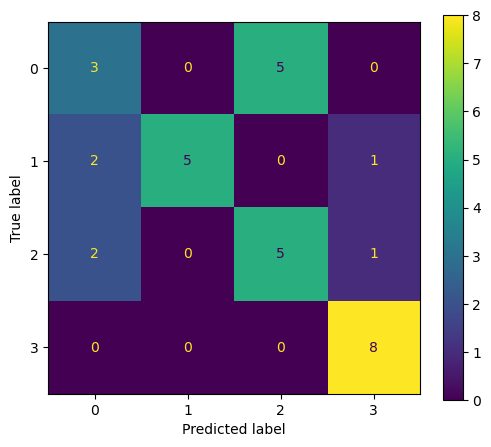

Accuracy score: 0.65625


In [23]:
lda = LinearDiscriminantAnalysis()
grad_boost = GradientBoostingClassifier()
pipeline = Pipeline(steps=[('lda', lda), ('grad_boost', grad_boost)])
param_grid = {
    'lda__n_components': np.arange(1,3),
}  

grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 0) 
grid.fit(X_train, y_train) 

model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm =confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

print("Accuracy score:",accuracy_score(y_test, y_pred))